In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

home_dir = "../"
src_path = os.path.join(home_dir, "src")

# Add the `src` folder to the Python path
sys.path.append(src_path)

from functions import (compute_distance_correlation_matrix,
 wgtda, compute_wto_matrix, compute_pearson_correlation_matrix,
  patient_correlation_measure)

from filters import remove_inf_values, extract_top_n_persistent_holes, filter_rows_by_list_length, filtering
from network import plot_gene_network, plot_gene_network_interactive, plot_gene_network_interactive2, set_plot_fonts

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# Load data from cancer stages
expression_matrix = pd.read_csv("../data/cancer_stage/fpkm_matrix.csv", index_col=0)
significant_genes = pd.read_csv("../data/cancer_stage/significant_genes.csv", index_col=0)

# Separate phenotype labels
phenotype = expression_matrix["phenotype"]
expression_matrix = expression_matrix.drop(columns=["phenotype"])

# Select significant genes
significant_gene_names = significant_genes.index
sig_exp_matrix = expression_matrix[significant_gene_names.intersection(expression_matrix.columns)]

top_var_genes_data = sig_exp_matrix
gene_dict = {i: col_name for i, col_name in enumerate(top_var_genes_data.columns)}
top_var_genes_data["phenotype"] = phenotype.values

stage1_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage1']
stage2_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage2']
stage3_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage3']
stage4_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage4']

stage1_top_var_genes_data = stage1_top_var_genes_data.drop(columns=["phenotype"])
stage2_top_var_genes_data = stage2_top_var_genes_data.drop(columns=["phenotype"])
stage3_top_var_genes_data = stage3_top_var_genes_data.drop(columns=["phenotype"])
stage4_top_var_genes_data = stage4_top_var_genes_data.drop(columns=["phenotype"])

# Split the data into training and testing sets for stage 1

stage1_wto_matrix = compute_wto_matrix(stage1_top_var_genes_data.values, "pearsons")
stage2_wto_matrix = compute_wto_matrix(stage2_top_var_genes_data.values, "pearsons")
stage3_wto_matrix = compute_wto_matrix(stage3_top_var_genes_data.values, "pearsons")
stage4_wto_matrix = compute_wto_matrix(stage4_top_var_genes_data.values, "pearsons")

# Define number of landscapes and resolution
num_landscape = 2
resolution = 100



In [3]:
stage1_interactions = wgtda(stage1_wto_matrix, dimensions=3, gene_dict=gene_dict)
stage2_interactions = wgtda(stage2_wto_matrix, dimensions=3, gene_dict=gene_dict)
stage3_interactions = wgtda(stage3_wto_matrix, dimensions=3, gene_dict=gene_dict)
stage4_interactions = wgtda(stage4_wto_matrix, dimensions=3, gene_dict=gene_dict)

In [7]:
stage1_interactions_filtered = filtering(stage1_interactions, top_n=10, min_length=3)
stage2_interactions_filtered = filtering(stage2_interactions, top_n=10, min_length=3)
stage3_interactions_filtered = filtering(stage3_interactions, top_n=10, min_length=3)
stage4_interactions_filtered = filtering(stage4_interactions, top_n=10, min_length=3)

In [8]:
print(len(stage1_interactions_filtered))
print(len(stage2_interactions_filtered))
print(len(stage3_interactions_filtered))
print(len(stage4_interactions_filtered))

216
135
156
119


Plot saved successfully to ../plots/networks/stage1_network at 600 DPI.


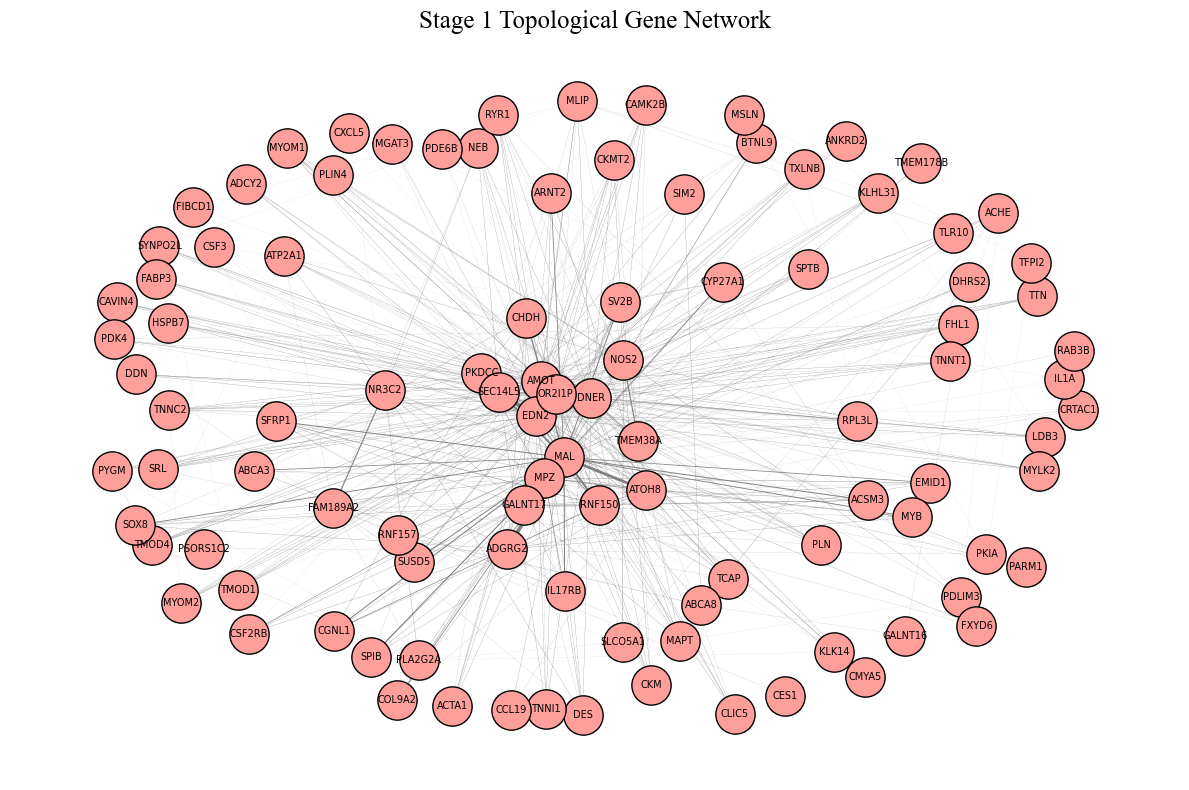

Plot saved successfully to ../plots/networks/stage2_network at 600 DPI.


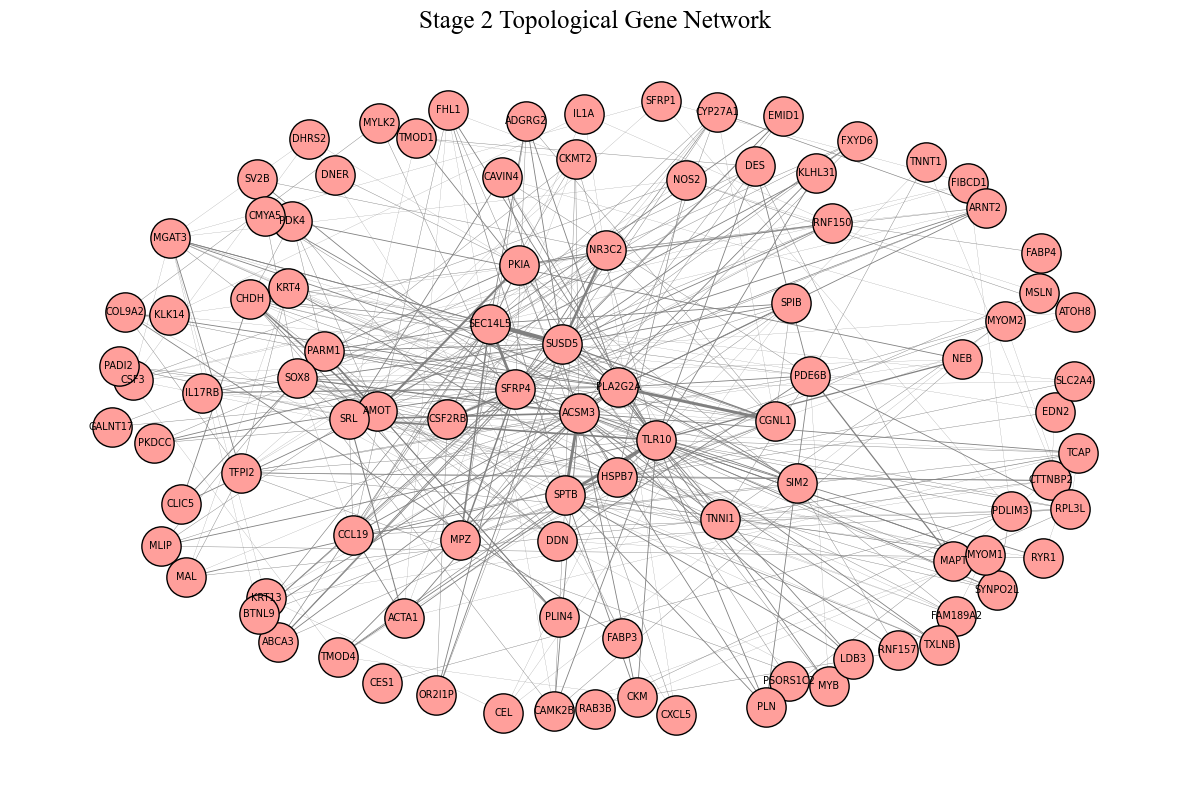

Plot saved successfully to ../plots/networks/stage3_network at 600 DPI.


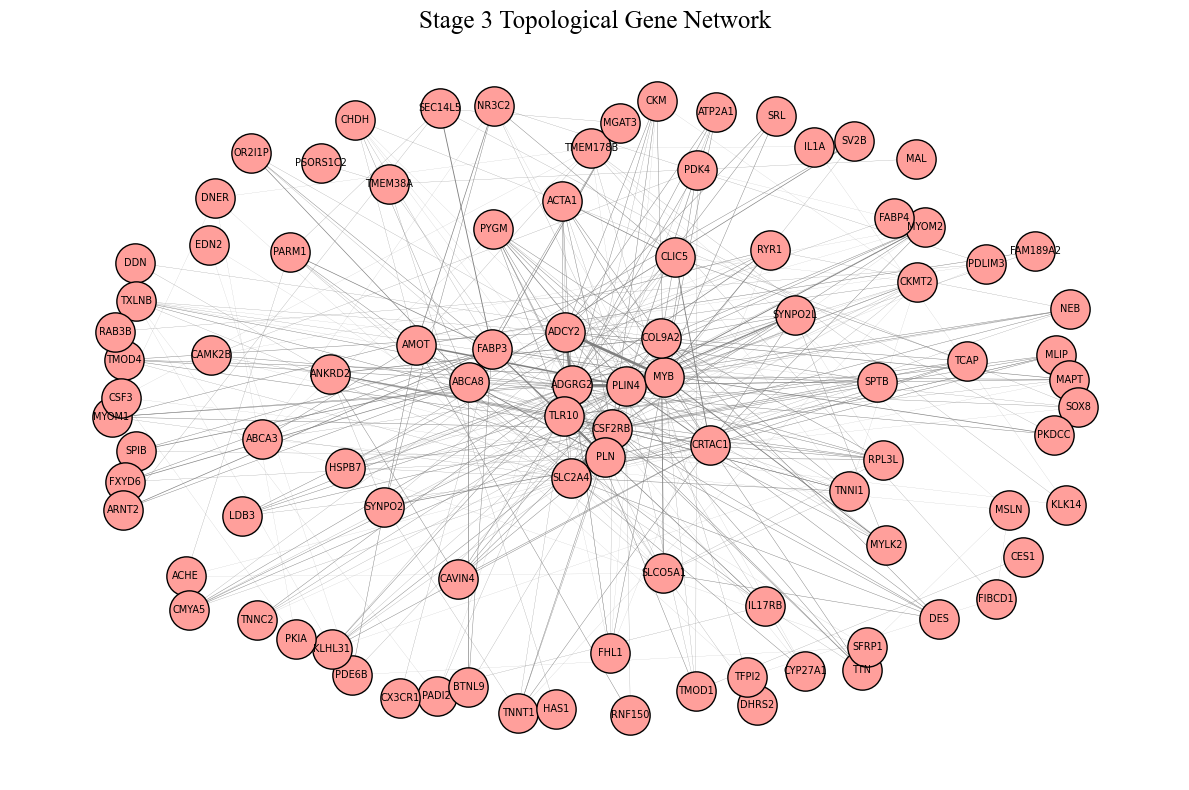

Plot saved successfully to ../plots/networks/stage4_network at 600 DPI.


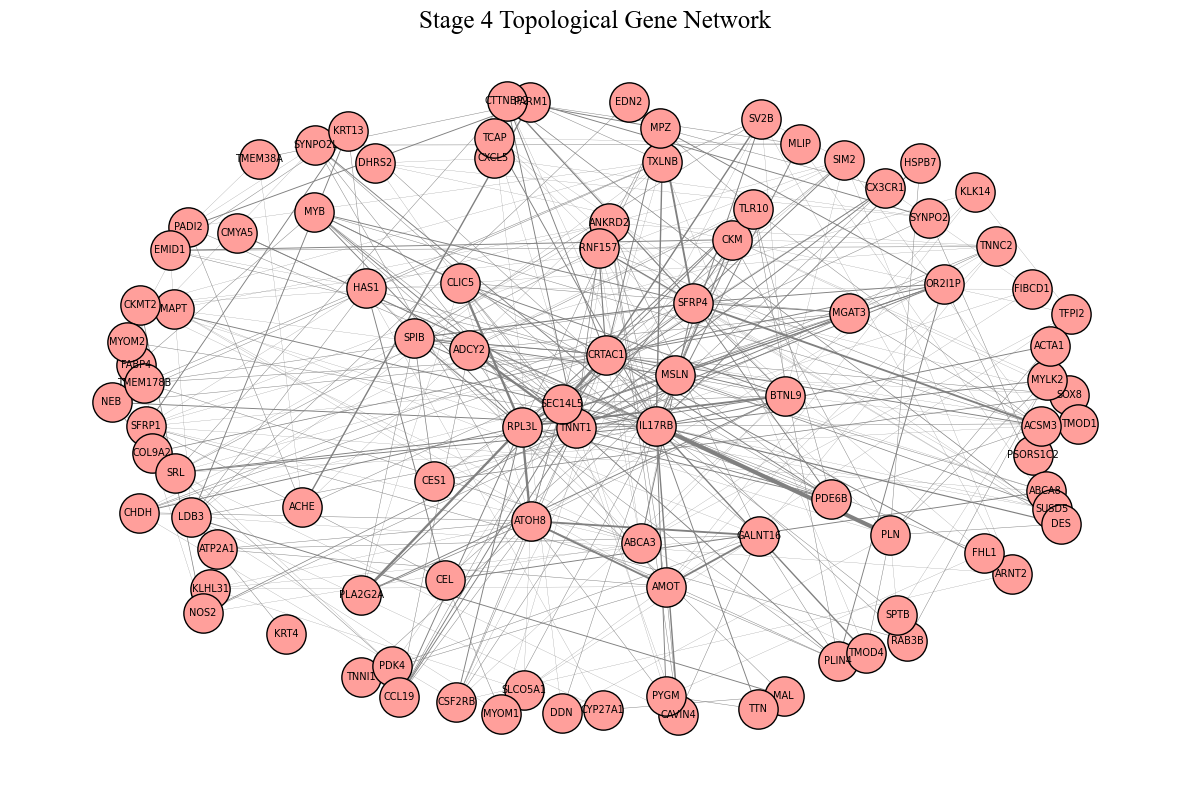

In [9]:
set_plot_fonts()
plot_gene_network(df=stage1_interactions_filtered, save_path="../plots/networks/stage1_network",title="Stage 1 Topological Gene Network", scale_factor=3, color_number=3)
plot_gene_network(df=stage2_interactions_filtered, save_path="../plots/networks/stage2_network",title="Stage 2 Topological Gene Network", color_number=3)
plot_gene_network(df=stage3_interactions_filtered, save_path="../plots/networks/stage3_network", title="Stage 3 Topological Gene Network", color_number=3)
plot_gene_network(df=stage4_interactions_filtered, save_path="../plots/networks/stage4_network", title="Stage 4 Topological Gene Network", color_number=3)